In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True

# *Table of contents*
1. [Problem 1: Multivariate normal, MLE proof](#problem1)
2. [Problem 2:  Binomial mean and variance formulas proof](#problem2)
3. [Problem 3: Bayesian Inference, univariate Gaussian with unknown mean](#problem3)
   1. [Problem 3.1: Mean and variance of the posterior proof](#problem3_1)
   2. [Problem 3.2: Bayesian Inference of the unknown posterior mean (code)](#problem3_2)
4. [Problem 4: Polynomial Regression (code)](#problem4)
5. [Problem 5: Full Bayesian Inference for polynomial regression (code)](#problem5)

---

# **Problem 1: Multivariate normal, MLE proof** <a id="problem1"></a>
**Let $\{x_1,...,x_N\}$ be $Ν$ random vectors following a multidimensional Normal distribution. Assuming that the covariance matrix is known, derive analytically the Maximum Likelihood Estimate $\mu_{ML}$ for the distribution's mean.**  

## *Solution*
We have $N$ random vectors $X = \{\vec{x_1},...,\vec{x_n}\}$ following a Normal multidimensional distribution $N(\vec{\mu},\Sigma)$, where the covariance matrix $\Sigma$ is known and we want to get the best point estimate for the parameter vector for the mean (since we are talking about a multidimensional normal) of the distribution $\vec{\mu}$ given the sample $X$, without utilizing any prior information. Following Bayes's rule: $$p(\vec{\mu}|X) = \frac{p(X|\vec{\mu})p(\vec{\mu})}{p(X)} \ \ (1)$$ 
where: 
- $p(\vec{\mu}|X)$ is the posterior pdf of $\vec{\mu}$ given the sample vectors $X$ 
-  $p(X|\vec{\mu})$ is the likelihood, which corresponds to the normal pdf that is most likely to have generated the sample data $X$ given the mean $\vec{\mu}$.
- $p(\vec{\mu})$ is our prior belief in the form of the pdf of the mean $\vec{\mu}$
$P(X) = \int P(X|\mu)P(\mu)$ is a marginal probability not dependent on $\vec{\mu}$ that scales the posterior so that $\int p(\vec{\mu}|X) = 1$ and does not affect its shape. Since we are interested in finding the pdf's maximum optima with respect to $\mu$, the point estimate where the partial derivative is 0, we are only concerned with the shape of the pdf. Thus the posterior is proportional to the likelihood multiplied with the prior:
$$(1) \implies  p(\vec{\mu}|X) \propto p(X|\vec{\mu})p(\vec{\mu}) $$
Since we are interested in a point estimate of the mean $\vec{\mu}$ without taking into account any prior beliefs, we can try to approximately maximize the posterior by maximizing only the likelihood in equation $(1)$ with respect to $\mu$. 
\\
\\
Thus we need to find $\vec{\mu_{ML}} = argmax_\mu p(X|\vec{\mu})$: $$p(X|\vec{\mu}) =\prod_{i=1}^Np(\vec{x_i}|\vec{\mu})$$ Additionally since maximizing a function is the same as maximizing the logarithm of said function (because the logarithm is a monotonic function):
 $$\ln p(X|\vec{\mu}) = \ln(\prod_{i=1}^Np(\vec{x_i}|\vec{\mu})) = \sum_{i=1}^N\ln p(\vec{x_i}|\vec{\mu})  = \sum_{i=1}^N \ln (\frac{1}{(2\pi)^{\frac{D}{2}}|\Sigma|^{\frac{1}{2}}} exp(-\frac{1}{2} (\vec{x}_i-\vec{\mu})^T \Sigma^{-1}(\vec{x}_i-\vec{\mu})))$$
 Since we are interested in maximizing $\mu$, the term before the exponential can be written as a constant $C$, since it does not contain the $\mu$ parameter, thus:
$$\implies \sum_{i=1}^N( \ln C -\frac{1}{2}(\vec{x}_i-\vec{\mu})^T \Sigma^{-1}(\vec{x}_i-\vec{\mu})) = N\ln C -\frac{1}{2} \sum_{i=1}^N((\vec{x}_i-\vec{\mu})^T \Sigma^{-1}(\vec{x}_i-\vec{\mu}))$$
Taking the partial derivative with respect to $\mu$ and using the differentiation rule: $\frac{d(\vec{\theta}^TA\vec{\theta})}{d(\vec{\theta})}=2A\vec{\theta}$
$$\implies \frac{\partial{\ln p(X|\vec{\mu})}}{\partial{\vec{\mu}}} = 0 - \frac{2}{2}\Sigma^{-1}\sum_{i=1}^N(x_i - \vec{\mu}) = -\Sigma^{-1}\sum_{i=1}^N x_i + \Sigma^{-1}N\vec{\mu}$$
setting the derivative to zero to find the maxima of $\vec{\mu}$ we get:
$$\implies \Sigma^{-1}N\vec{\mu} = \Sigma^{-1}\sum_{i=1}^N x_i \implies \vec{\mu}_{ML} = \frac{1}{N}\sum_{i=1}^N x_i $$

---

# **Problem 2:  Binomial mean and variance formulas proof** <a id="problem2"></a>

## *Solution* <a class="anchor" id="Solution2"></a>
The binomial distribution probability mass function is given by: $$Bin(m|N,\mu) =  {N \choose m}\mu^m(1-\mu)^{N-m}= \frac{N!}{(N-m)!m!}\mu^m(1-\mu)^{N-m}$$ It's a way to model the probability that $m$ successes will occur in $N$ independent Bernoulli success-failure trials, where the probability of success is $\mu$ and its the same across all trials. 
For a single Bernoulli trial, its probability mass function is $Bern(x|\mu) = \mu^x(1-\mu)^{1-x}$, thus:
$$E[x] = \sum_{x\in\{0,1\}}x Bern(x|\mu) =  \sum_{x\in\{0,1\}}x \mu^x(1-\mu)^{1-x} = 0 + \mu = \mu$$
$$V[x] = E[x^2]-E[x]^2 = \sum_{x\in\{0,1\}}x^2 \mu^x(1-\mu)^{1-x} - (\sum_{x\in\{0,1\}}x \mu^x(1-\mu)^{1-x})^2 = \mu - \mu^2 = {\mu(1-\mu)}$$ 
Thus for $N$ subsequent independent Bernoulli trials of which the Binomial consists of, its expected value and variance is equal to the sum of the expected values, variances of each independent Bernoulli trial:

$$E[m] = \sum^N_{i=1}E[x_i] = \sum^N_{i=1}\sum_{x_i\in\{0,1\}}x_i\mu^x_i(1-\mu)^{1-x_i} = N\mu$$
$$V[m] =  \sum^N_{i=1}V[x_i] = \sum^N_{i=1}(\sum_{x\in\{0,1\}}x_i^2 \mu^{x_i}(1-\mu)^{1-x_i} - (\sum_{x\in\{0,1\}}x_i \mu^x_i(1-\mu)^{1-x_i})^2) = N\mu(1-\mu)$$

---

# **Problem 3: Bayesian Inference, univariate Gaussian with unknown mean** <a id="problem3"></a>

## **Problem 3.1: Mean and variance of the posterior proof**  <a id="problem3_1"></a>
**Prove the the formulas for the mean and variance of the posterior are: $\mu_N =\frac{N\sigma_0^2\bar{x}+ \sigma^2\mu_0}{N\sigma_0^2 + \sigma^2}$, $\sigma^2_N = \frac{\sigma^2\sigma^2_0}{N\sigma^2_0 + \sigma^2}$**

### *Solution*
we know that the posterior distribution is given by: $$p(\mu|X) \propto p(X|\mu)p(\mu)$$
where $p(\mu|X)$ is the posterior distribution, $p(X|\mu)$ is the likelihood and $p(\mu)$ is the prior distribution. And:
$$p(X|\mu) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{\sum^N_{i=1}(x_i-\mu)^2}{2\sigma^2})$$
$$p(\mu) = \frac{1}{\sqrt{2\pi\sigma_0^2}}exp(-\frac{(\mu-\mu_0)^2}{2\sigma_0^2})$$ 
The posterior is proportional to their product, thus:
$$p(\mu|X) \propto \frac{1}{2\pi\sigma^2\sigma_0^2}exp(-\frac{\sum^N_{i=1}(x_i-\mu)^2}{2\sigma^2} -\frac{(\mu-\mu_0)^2}{2\sigma_0^2}) = \frac{1}{2\pi\sigma^2\sigma_0^2}exp(-\frac{\sigma^2_0\sum^N_{i=1}(x_i-\mu)^2- \sigma^2(\mu-\mu_0)^2}{2\sigma^2\sigma^2_0}) = \\ \frac{1}{2\pi\sigma^2\sigma_0^2}exp(\frac{- \sigma^2_0\sum^N_{i=1}x^2_i + 2\sigma^2_0\mu\sum^N_{i=1}x_i - \sigma^2_0\mu^2N - \sigma^2\mu^2 + 2\mu\mu_0\sigma^2 - \sigma^2\mu^2_0}{2\sigma^2\sigma^2_0}) =  \frac{1}{2\pi\sigma^2\sigma_0^2}exp(\frac{(-\sigma^2_0\mu^2_0 + \sigma^2_0\sum^N_{i=1}x^2_i) +2\mu(\sigma^2_0\sum^N_{i=1} + \mu_0\sigma^2) - \mu^2(\sigma^2_0N + \sigma^2 )}{2\sigma^2\sigma^2_0})$$ 
In the denominator we have a form $ax^2 - bx + c$, where c is a constant, to complete the square we devide by $a$:
$$\frac{1}{2\pi\sigma^2\sigma_0^2}exp(\frac{-(\mu^2 - \frac{2\mu(\sigma^2_0\sum^N_{i=1} + \mu_0\sigma^2)}{\sigma^2_0N + \sigma^2 } + \frac{(\sigma^2_0\mu^2_0 + \sigma^2_0\sum^N_{i=1}x^2_i)}{\sigma^2_0N + \sigma^2 })}{\frac{2\sigma^2\sigma^2_0}{\sigma^2_0N + \sigma^2}})$$ 
And then add and subtract $\frac{b^2}{(2a)^2}$ to get:
$$\frac{1}{2\pi\sigma^2\sigma_0^2}exp(\frac{-(\mu^2 - \frac{2\mu(\sigma^2_0\sum^N_{i=1} + \mu_0\sigma^2)}{\sigma^2_0N + \sigma^2 } + \frac{(\sigma^2_0\mu^2_0 + \sigma^2_0\sum^N_{i=1}x^2_i)}{\sigma^2_0N + \sigma^2 })}{\frac{2\sigma^2\sigma^2_0}{\sigma^2_0N + \sigma^2}}) = \frac{1}{2\pi\sigma^2\sigma_0^2}\exp\left(\frac{-\left(\mu - \frac{(\sigma_0^2\sum_{i=1}^{N}x_i + \sigma^2\mu_0)}{\sigma_0^2N + \sigma^2}\right)^2}{\frac{2\sigma^2\sigma_0^2}{(\sigma_0^2N + \sigma^2)^2}} + \frac{(\sigma_0^2\sum_{i=1}^{N}x_i + \sigma^2\mu_0)^2}{2\sigma^2\sigma_0^2(\sigma_0^2N + \sigma^2)^2}\right) = \exp\left(\frac{-\left(\mu - \frac{(\sigma_0^2\sum_{i=1}^{N}x_i + \sigma^2\mu_0)}{\sigma_0^2N + \sigma^2}\right)^2}{\frac{2\sigma^2\sigma_0^2}{(\sigma_0^2N + \sigma^2)^2}}\right)$$ 

---

## **Problem 3.2: Bayesian Inference of the unknown posterior mean (code)**  <a id="problem3_2"></a>
**Consider now that $x$ follows the distribution $x\simΝ(μ,16)$, and as Bayesians, we assume a prior for the mean $\mu \sim Ν(0,4)$. Use the distribution $Ν(7,16)$ to generate $N$ observations for $x$**
- **a) Develop an algorithm that estimates the mean and variance of the posterior distribution , assuming we have available a dataset of $N = 1, 5, 10, 20, 50, 100, 1000$ observations, respectively. What do you observe as the number of observations $N$ is increasing?**
- **b) For every value of $N$, provide a diagram that shows the prior distribution, the distribution generating the data, and the estimated posterior distribution. Clearly label the axes of your diagrams.**

### *Solution*
From 3.1 we have derived that:
- The mean of the posterior distribution $p(\mu|X)$, is given by:
$$\mu_N =\frac{N\sigma_0^2\bar{x}+ \sigma^2\mu_0}{N\sigma_0^2 + \sigma^2} \ \ (1)$$
- The variance is given by:
$$\sigma^2_N = \frac{\sigma^2\sigma^2_0}{N\sigma^2_0 + \sigma^2} \ \ (2)$$

Our goal is to develop a method that estimates the mean and variance of the posterior, given a dataset of observations and then plots a diagram of:
- The prior distribution 
- The generating distribution 
- The estimated posterior distribution

All distributions refer to univariate normals of form: $$p(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

To achieve this we create a class: `Univariate_Bayesian_Inference` to house all the methods needed for the tasks above.
1. Since the prior distribution, as well as the generating distribution are known we pass their parameters as arguments in the class constructor 
2. First  `generating_distribution_sampling` allows us to generate a dataset $X$ of a defined number of observations via the normal function provided by the numpy library:  `np.random.normal(mean,stdv,size)`, since we know the variance, we pass its square root `var**(1/2)` as the standard deviation. The `size` of the sample is defined when the method is called by the argument `draws`
3. Then, passing the generated dataset $X$ to the `MAP_estimation` method utilizes equations we have derived: (1), (2) to estimate the mean and variance of the posterior distribution.
  
If we wish to plot the pdf's of the prior, generating and the estimated posterior distribution we can:
1. Get the 100 evenly seperated points from each distibution utilizing methods: `generative_distribution_points`, `prior_distribution_points` , `posterior_distribution_points`, which use the known parameters (passed as arguments in the class constructor), of the generating and prior distribution as well as the estimated mean from the `MAP_estimation` to pick observations in the range of the distribution in the x-axis (using the rule that 99.7% of the observations lie from to the mean to 3 standard deviations away) and find their target on y-axis using the univariate nomral fomrula. 
2. We use these points to generate each of the pdfs on the same figure utilizing the `plot_pdfs` method 

In [90]:
class Univariate_Bayesian_Inference():
    """Univariate_Bayesian_Inference contains methods for generating samples from a univariate normal distribution,
        estimating the mean and variance of the posterior distribution 
        and plotting the prior, generating, and posterior distributions."""
    
    def __init__(self,prior_mean,prior_var,generating_mean,generating_var):
        self.prior_mean = prior_mean
        self.prior_var = prior_var
        self.generating_mean = generating_mean
        self.generating_var = generating_var

    #Since we dont want to caputre specifically evenly separated points as the points in self.generative_x below , 
    # we utilizie the numpy random.normal function
    def generating_distribution_sampling(self,draws):
        #draws is the number of samples we want to generate
        generated_samples = np.random.normal(self.generating_mean,(self.generating_var)**(1/2),size = draws)
        return generated_samples
    
    # We get points to plot the pdf, using evenly seperated points for the x axis that fit the range of the distribution and 
    # their corresponding density based on the Gaussian function
    def generative_distribution_points(self):
        generative_sigma = (self.generating_var)**(1/2)
        # We use 100 observation/target pairs to plot the pdf
        self.generative_x = np.linspace(self.generating_mean- 3*generative_sigma, self.generating_mean + 3*generative_sigma, 100)
        self.generative_y = 1/(np.sqrt(2*np.pi)*generative_sigma)*np.exp(-(self.generative_x  - self.generating_mean)**2/(2*generative_sigma**2))
        return self.generative_x, self.generative_y
    
    # As above 
    def prior_distribution_points(self):
        prior_sigma = (self.prior_var)**(1/2)
        self.prior_x = np.linspace(self.prior_mean- 3*prior_sigma, self.prior_mean + 3*prior_sigma, 100)
        self.prior_y = 1/(np.sqrt(2*np.pi)*prior_sigma)*np.exp(-(self.prior_x  - self.prior_mean)**2/(2*prior_sigma**2))
        return self.prior_x, self.prior_y
    
    # As above 
    def posterior_distribution_points(self):
        try:
            posterior_sigma = (self.posterior_var)**(1/2)
            self.posterior_x = np.linspace(self.posterior_mean- 3*posterior_sigma, self.posterior_mean + 3*posterior_sigma, 100)
            self.posterior_y = 1/(np.sqrt(2*np.pi)*posterior_sigma)*np.exp(-(self.posterior_x - self.posterior_mean)**2/(2*posterior_sigma**2))
        except NameError:
            print("You cant sample from the posterior without first estimating its paremeters, use the MAP_estimator method first")
        return self.posterior_x, self.posterior_y
    
    def MAP_estimation(self,generated_samples):
        # Posterior mean estimation using equation (1)
        N = generated_samples.shape[0]
        x_bar = np.mean(generated_samples)
        self.posterior_mean = (N*self.prior_var*x_bar + self.generating_var*self.prior_mean)/(N*self.prior_var + self.generating_var)
        # Posterior variance estimation using equation (2)
        self.posterior_var = (self.generating_var* self.prior_var)/(N*self.prior_var + self.generating_var)
        return self.posterior_mean,self.posterior_var

    def plot_pdfs(self,generated_samples):
        plt.figure(figsize = (9,6))
        plt.title(f"Maximum a posterior estimation of posterior probability of the mean given N={generated_samples.shape[0]} data-points"
                  , fontsize = 14)
        # We plot the distributions based on the points we have calculated 
        plt.plot(self.generative_x, self.generative_y,  color = "tab:blue", label = "Generating Distribution",linewidth=3 )
        plt.plot(self.prior_x,self.prior_y,  color = "tab:green", label = "Prior Distribution of the mean",linewidth=3 )
        plt.plot(self.posterior_x, self.posterior_y, color = "tab:orange", label = "Posterior Distribution of the estimated mean",linewidth=3)
        #Vertical lines to the denote the means of each distribution
        plt.vlines(7,0,4, linestyles='dashed', label = "True mean", color = "tab:blue",linewidth=1.5, alpha = 0.8)
        plt.vlines(0,0,4, linestyles='dashed', label = "Prior mean", color = "tab:green",linewidth=1.5, alpha = 0.8)
        plt.vlines(self.posterior_mean,0,4, linestyles='dashed', color = "tab:orange", label = "Estimated mean",linewidth=1.5, alpha = 0.8)
        # Misc settings
        plt.legend(fontsize = 11)
        plt.ylim(0,4)
        plt.grid(alpha = 0.3)
        plt.ylabel("Density", fontsize = 14)
        plt.xlabel("x",fontsize = 14)
        plt.xticks(np.arange(-8,22,2))
        plt.yticks(np.arange(0,4.0,0.5))
        plt.show()

Having created the `Univariate_Bayesian_Inference` we can estimate the mean and variance of the posterior using the Maximum a Posteriory(MAP) method for sample datasets $X$ of size $N = [N= 1, 5, 10, 20, 50, 100, 1000]$, where $X\sim N(7,16)$ with a prior belief for the mean $\mu \sim N(0,4)$. We begin by initializing an instance of the `Univariate_Bayesian_Inference` class called `experiment` and pass in the relevant known parameters of the prior and generating distributions

In [91]:
experiment = Univariate_Bayesian_Inference(prior_mean=0,prior_var=4,generating_mean=7,generating_var=16)

Now we solve the problem a) b) step by step:
1. We sample $N$ points from the generating distribution
3. We utilize the MAP method to estimate the mean $equation \ (1)$ and variance $equation \ (2)$ of the posterior for the $N$ points sampled from the generating distribution
4. We use the estimated mean and variance of the posterior as well as the known generating, prior mean and variance to retrieve 100 observation-target pairs for each distribution 
5. We plot the distributions per sample size $N$

----- For 1 sample(s), posterior mean = 1.8, posterior variance = 3.2 ----


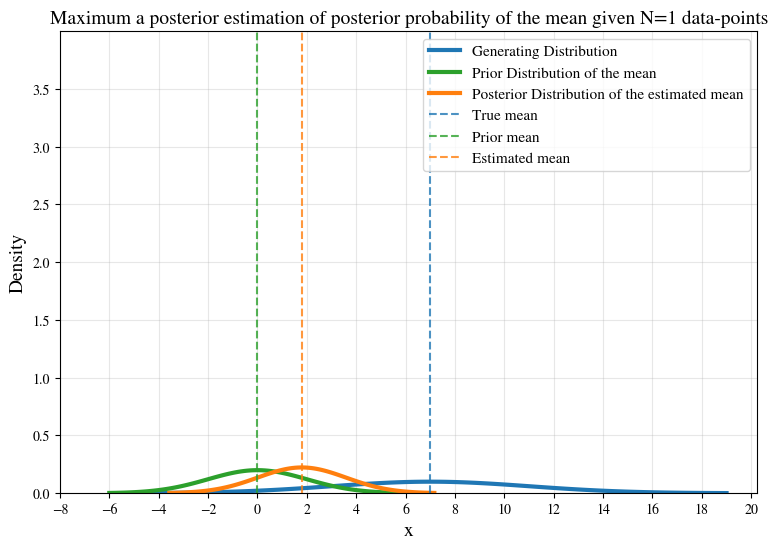

----- For 5 sample(s), posterior mean = 4.58, posterior variance = 1.78 ----


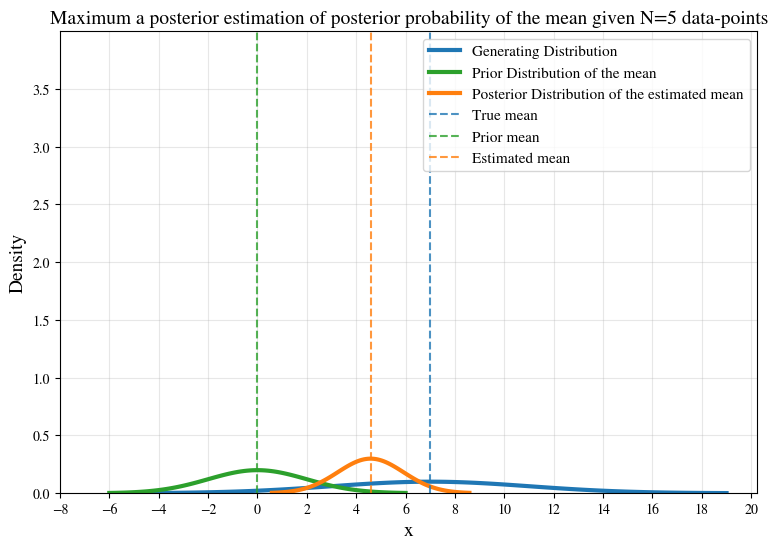

----- For 10 sample(s), posterior mean = 4.29, posterior variance = 1.14 ----


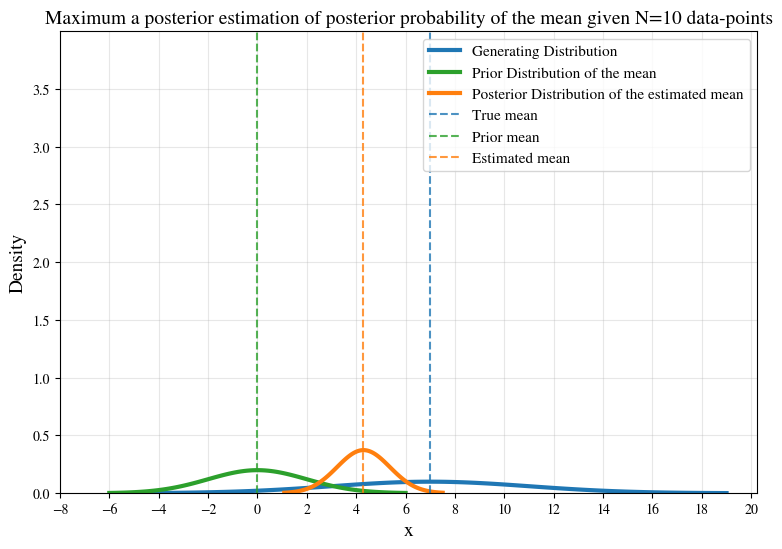

----- For 20 sample(s), posterior mean = 4.92, posterior variance = 0.67 ----


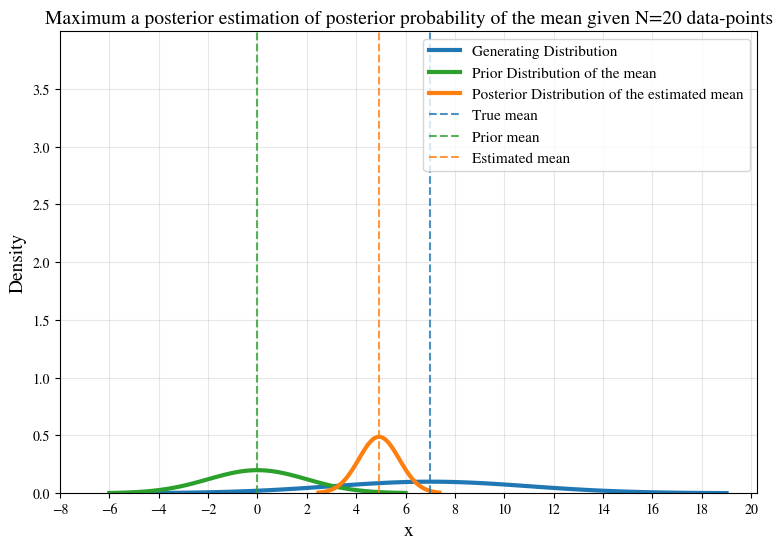

----- For 50 sample(s), posterior mean = 6.17, posterior variance = 0.3 ----


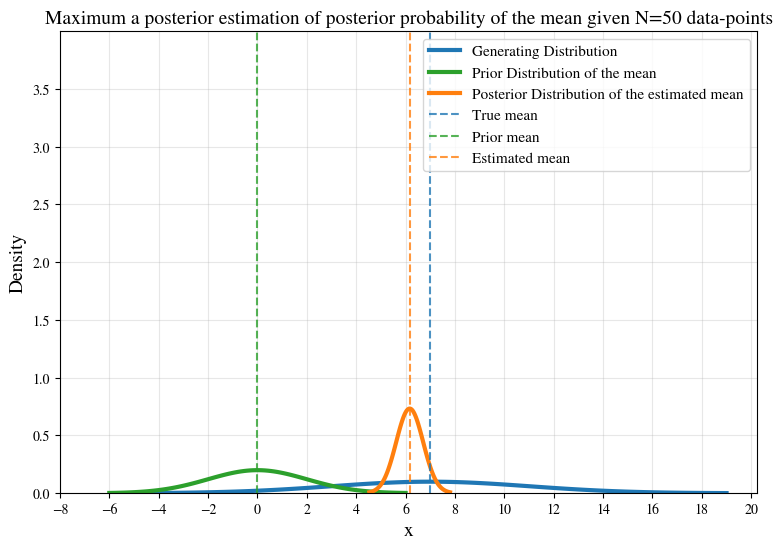

----- For 100 sample(s), posterior mean = 6.95, posterior variance = 0.15 ----


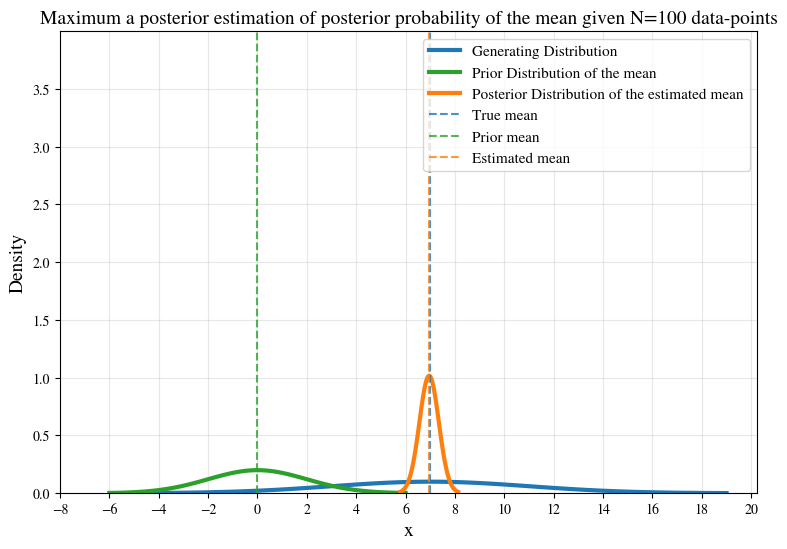

----- For 1000 sample(s), posterior mean = 7.18, posterior variance = 0.02 ----


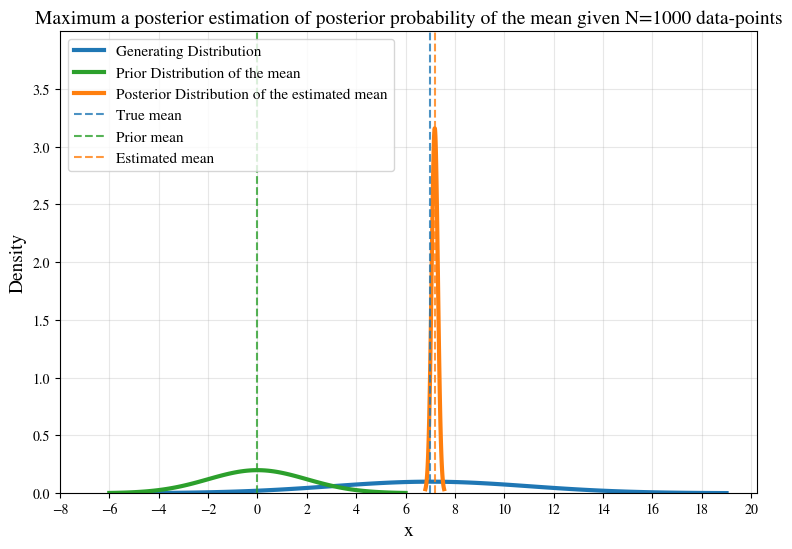

In [92]:
#seed for reproducability
np.random.seed(42)
for i in [1,5,10,20,50,100,1000]:
    #Get sample points 
    generated_samples = experiment.generating_distribution_sampling(i)
    mean, var = experiment.MAP_estimation(generated_samples)
    print(f"----- For {i} sample(s), posterior mean = {round(mean,2)}, posterior variance = {round(var,2)} ----")
    #Get the points to plot the distributions
    experiment.generative_distribution_points()
    experiment.posterior_distribution_points()
    experiment.prior_distribution_points()
    experiment.plot_pdfs(generated_samples)

### **Discussion**

Looking at the equations that give us the mean and variance of the posterior, $\mu_N =\frac{N\sigma_0^2\bar{x}+ \sigma^2\mu_0}{N\sigma_0^2 + \sigma^2}$, and $\sigma^2_N = \frac{\sigma^2\sigma^2_0}{N\sigma^2_0 + \sigma^2}$ respectively, its evident that  and considering our prior beliefs $N \sim (0,4)$ compared to the true generating distribution $X \sim (7,16)$ the reason behind this observation is clear:   
1. We begin by a false prior belief for the mean $\mu_{prior}=0$, not close the true generating distribution mean $\mu_{generating}=7$, with certainty modeled by the prior variance $\sigma^2_{prior} = 4$
2. Additionally from the equations:  $\mu_N =\frac{N\sigma_0^2\bar{x}+ \sigma^2\mu_0}{N\sigma_0^2 + \sigma^2}$, and $\sigma^2_N = \frac{\sigma^2\sigma^2_0}{N\sigma^2_0 + \sigma^2}$, we see that:
   1. For $N=0 \rightarrow \mu_N = \mu_{0}$ and $\sigma_N = \sigma_0$, so we pay full attention to the prior
   2. For $N != 0 \rightarrow \mu_N =  \mu_N =\frac{N\sigma_0^2\bar{x}+ \sigma^2\mu_0}{N\sigma_0^2 + \sigma^2}$, and $\sigma^2_N = \frac{\sigma^2\sigma^2_0}{N\sigma^2_0 + \sigma^2}$, the (estimated in real problems) generating distribution parameters come into play. 
       - If $\sigma^2 << \sigma^2_{prior}$, we pay more attention to the (in actual problems, estimated based on the observations) generating distribution rather than the prior.
       - If $\sigma^2 >> \sigma^2_{prior}$, the opposite is true 
   3. If $N$ tends to $\infty$, then $\mu_N = \mu_{generating}$ and $\sigma^2_N = 0$, that means that the estimation of the posterior is based solely on the observed data and matches the generating $\mu$ parameter

Thus as you can notice in the plots above since $\sigma^2 > \sigma^2_{prior}$, for low number of samples we are estimating the posterior mean $\mu_N$ close to the false prior mean $\mu_prior$. But as $N$ increases sufficiently (concerning the complexity of the problem), the estimated posterior mean tends to move away from the prior and reaches the generating mean $\mu_{generating}$, with ever decreasing estimation uncertainty $\sigma^2_N$, finally at $N=1000$, we have a case similar to 3. above, where $\mu_N \approx \mu_{generating}$ and $\sigma^2_N \approx 0$

---

# **Problem 4: Polynomial Regression** <a > <a id="problem4"></a>
Draw a period of the sinusoidal function $y(x)=sin(2πx)$ and select $N$ samples for $x$ uniformly distributed in the interval $[0,1]$. To every $y(x)$ add Gaussian noise distributed as $Ν(0,1)$ to generate a data set of noisy observations.
Fit to the noisy observations a polynomial model of degree $M=2,3,4,5,9$ and provide a table with the coefficients of the best least-squares fit model and the achieved RMSE. Also, provide a plot showing the function $y(x)$, the observations drawn, and the best fit model for every value of M.
Repeat the above procedure for two values of $N=10$ and $N=100$. What do you observe? Discuss your findings.

## *Solution*
The true model is of the form  $y(x)=sin(2πx)$ and the generating model is $t = sin(2\pi x) + \eta$, where $\eta \sim Ν(0,1)$. 

We wish to perform regression and estimate the polynomial model that best fits the true model using the Least Squares method and evaluating the root mean squared error (RMSE)
Below we build a class called `Least_squares_regression` with methods that will carry out these tasks.
1. `generate_model_points` generates the targets $y$ for an $X$ sample of size $N$, evenly distributed between $[0,1]$. We manage that by using `np.linspace(0,1,N)` to draw $N$ evenly seperated samples in the described range and then using the generating model $y(x)$ to generate the targets for the sample observations. Additionally with the same logic we draw 100 points to plot the true shape of the curve using the true model $y(x)$ without noise.
2. We are itrested in creating various polynomial models to fit and evaluate, for this reason we code the method `polynomial_model_constructor` which creates a matrix of form $$\Phi = \begin{bmatrix}  1 & x_1 & x_1^2 & x_1^3   &  \dots  \\ 1 & x_2 & x_2^2 & x_2^3  & \dots  \\ \vdots & \vdots & \vdots & \vdots  & \vdots \\ 1 & x_n & x_n^2 & x_n^3 & \dots  \end{bmatrix}$$ that has as many rows as  our $X$ sample sizes and as many columns as the polynomial degree of choice + 1 for the bias term. This allows us to write all possible polynomials of choice in the form $Y = \vec{w}\Phi $  where the weight vector $\vec{w}$, is a column vector of rows = columns of $\Phi$ 
3. In order to `fit` the constructed polynomial model we utilize the the least squares error estimation method for generalized linear regression(since the model is linear on the parametes in the $\vec{w}$) $$\vec{w_{LS}}=(\Phi^T \Phi)^{-1}\Phi^T\vec{y}$$
4. Having fitted the model we can `predict` via our model structure with the trained weight vector $\vec{y_{pred}} = \Phi\vec{w_{LS}}$
5. Finally we can `evaluate` the performance of our fitted model by finding the root mean squared error (RMSE) of our predictions  $\vec{y_{pred}}$  vs the true values  $\vec{y_{true}}$:  $$(RMSE) = \sqrt{\frac{1}{N} \sum_{i=1}^{N} ({y_{i_{pred}}}-{y_{i_{true}}})^2}$$

In [93]:
class Least_squares_regression():
    """Least_squares_regressionp rovides functionality to create and fit a polynomial regression model using the least squares method.
      It allows users to generate sample data, construct polynomial models, fit them and predict values for new data."""
    def generate_model_points(self,N,evenly_spaced=True):
        # 100 points to graph a period of the true model
        x_generating = np.linspace(0,1,100)
        y_generating = np.sin(2*np.pi*x_generating)
        #generating model with sample of size N predictions + noise 
        if evenly_spaced:
            X_train = np.linspace(0,1,N)
            y_train = np.sin(2*np.pi*X_train) + np.random.normal(0,1,N)
        else:
            X_train = np.random.uniform(0,1,N)
            y_train = np.sin(2*np.pi*X_train) + np.random.normal(0,1,N)
        return X_train, y_train, x_generating, y_generating
    
    def polynomial_model_constructor(self,X,degree):
        Phi =[]
        for i in range(X.shape[0]):
            #Create the structure of the model, based on the polynomial degree using a list comprehension
            Phi.append([1] + [X[i]**j for j in range(1,degree+1)])
        return np.array(Phi)

    #Fit the model using the least squares method to find the optimal weights
    def fit(self,Phi,y_train):
        self.w = np.dot((np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)), y_train)
        return self.w

    #Predict the values of the model for new data using the trained weights
    def predict(self,Phi):
        return np.dot(Phi, self.w)

    #Calculate the root mean squared error of the model
    def evaluate(self,y_pred,y_train):
        return np.sum((((y_pred - y_train)**2)/y_train.shape[0])**(1/2))

In [94]:
model_1 = Least_squares_regression()

Having created an isntance of the class ` Least_squares_regression`, we code to functions that will help us carry the problem specific tasks in a compact form for all polynomial cases.

1. `fit_and_evaluate_polynomials`, allows us to construct, fit and evaluate polynomials of varying degrees vs the true model described above, by just passing the training test and the degress of polynomials we want as function arguments. The function returns the $\vec{w}$ of each polynomial as well as its predictions and $RMSE$ score.

2. `plot_fitted_models` is a void function that just plots all the constructed and fitted models of `fit_and_evaluate_polynomials` in a single figure along with the true model and common training set.

In [95]:
def fit_and_evaluate_polynomials(X_train,y_train,regression_model,degrees:list):
  """fit_and_evaluate_polynomials function can be used to fit and 
  evaluate polynomial models of varying degrees, passed in as a list of integers."""
  #Build the Phi matrix per polynomial degree
  per_polynomial_Phi = []
  for degree in degrees:
      Phi = regression_model.polynomial_model_constructor(X_train,degree)
      per_polynomial_Phi.append(Phi)

  #Collect as we iterate per polynomial relevant information ( weights,)
  per_polynomial_w = [] 
  per_polynomial_predictions = []
  per_polynomial_RMSE = []
  for Phi in per_polynomial_Phi:
    # Fit
    w = regression_model.fit(Phi,y_train)
    per_polynomial_w.append([round(coef,4) for coef in w])
    #Predict
    y_pred = regression_model.predict(Phi)
    per_polynomial_predictions.append(y_pred)
    # Evaluate
    RMSE = regression_model.evaluate(y_pred,y_train)
    per_polynomial_RMSE.append(RMSE)
  return per_polynomial_w, per_polynomial_predictions, per_polynomial_RMSE

#Plots all the fitted polynomial models created with fit_and_evaluate_polynomials, as well as the true model
def plot_fitted_models(X_train,y_train,per_polynomial_predictions,x,y):
    """plot_fitted_models function plots the curves of the fitted polynomial models and the true model."""   
    plt.figure(figsize=(10,10))
    plt.title(f"Least squares fitted polynomial models of varying degrees vs the true model curve for a sample dataset of N = {X_train.shape[0]}",fontsize = 14)
    plt.scatter(X_train,y_train,label = "Training set",color = "tab:pink",alpha=0.8)
    for predictions,degree in zip(per_polynomial_predictions,[2,3,4,5,9]):
        plt.plot(X_train,predictions,label =f"Polynomial Model of degree: {degree}",linewidth=2,)
    plt.plot(x,y,label="True Model sin(2πx)", color = "Black",linewidth=2,linestyle='-.')
    plt.ylabel("Targets",fontsize = 15)
    plt.xlabel('Observations',fontsize = 15)
    plt.xlim(0,1)
    plt.ylim(-3,3)
    plt.legend()
    plt.grid(alpha= 0.3)
    plt.show()

### **For N=60 sample observations**

In [96]:
np.random.seed(42)
ploynomial_degrees = [2,3,4,5,9]
X_train,y_train,x,y = model_1.generate_model_points(50)
per_polynomial_w, per_polynomial_predictions, per_polynomial_RMSE = fit_and_evaluate_polynomials(X_train,y_train,model_1,ploynomial_degrees)
#Pass the results in a dataframe for a markdown table
data = {"Polynomial Model degree":ploynomial_degrees,"Coefficients":per_polynomial_w,"RMSE":per_polynomial_RMSE}
df = pd.DataFrame(data)
# print(df.to_markdown()) #markdown, which is then placed in a markdown cell shown below (seed is set to 42, thus the results are reproducible) 

|    |   Polynomial Model degree | Coefficients                                                                                                           |    RMSE |
|---:|--------------------------:|:-----------------------------------------------------------------------------------------------------------------------|--------:|
|  0 |                         2 | [1.312, -4.5172, 2.1416]                                                                                               | 5.10505 |
|  1 |                         3 | [0.6707, 3.59, -18.3325, 13.6494]                                                                                      | 4.97639 |
|  2 |                         4 | [0.6434, 4.1916, -21.104, 17.9891, -2.1699]                                                                            | 4.96686 |
|  3 |                         5 | [0.5343, 8.0014, -48.8533, 93.0714, -87.044, 33.9497]                                                                  | 4.95825 |
|  4 |                         9 | [0.444, -19.0697, 911.9311, -10498.867, 55331.7644, -160245.8439, 271469.8698, -268483.8108, 143706.6552, -32174.4038] | 4.82873 |

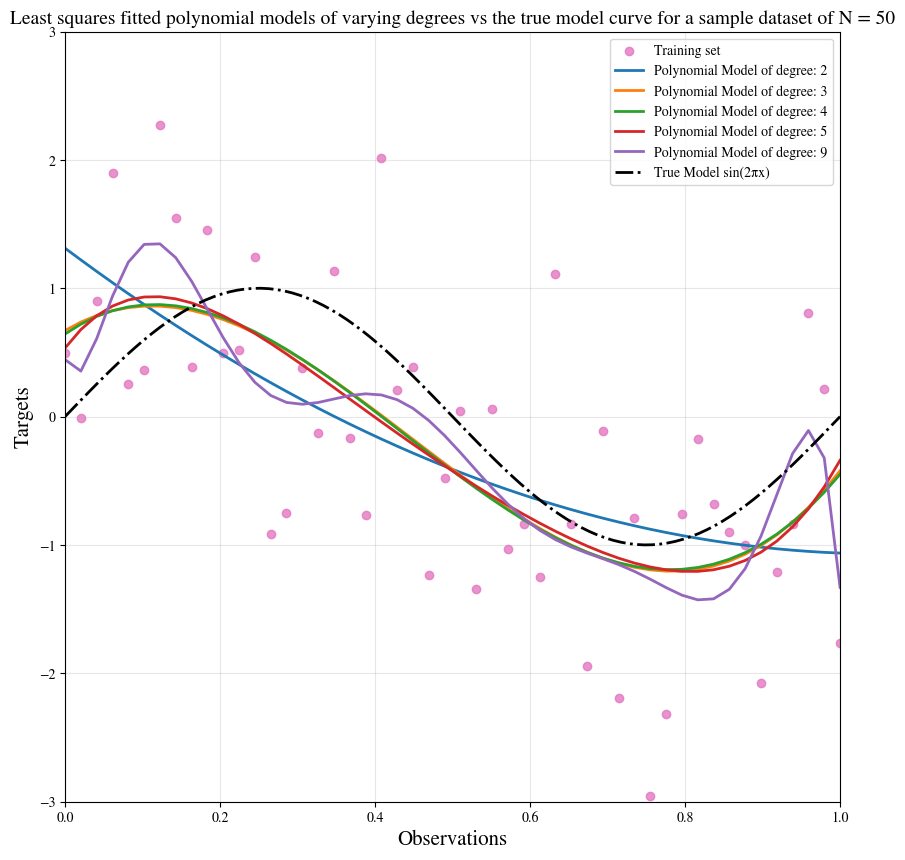

In [97]:
plot_fitted_models(X_train,y_train,per_polynomial_predictions,x,y)

### **For N=10 sample observations**

In [98]:
np.random.seed(42)
ploynomial_degrees = [2,3,4,5,9]
X_train,y_train,x,y = model_1.generate_model_points(10)
per_polynomial_w, per_polynomial_predictions, per_polynomial_RMSE = fit_and_evaluate_polynomials(X_train,y_train,model_1,ploynomial_degrees)
#Pass the results in a dataframe for a markdown table
data = {"Polynomial Model degree":ploynomial_degrees,"Coefficients":per_polynomial_w,"RMSE":per_polynomial_RMSE}
df = pd.DataFrame(data)
# print(df.to_markdown()) #markdown is then placed in a markdown cell shown below (seed is set to 42, thus the results are reproducible) 

|    |   Polynomial Model degree | coefficients                                                                                                                 |      RMSE |
|---:|--------------------------:|:-----------------------------------------------------------------------------------------------------------------------------|----------:|
|  0 |                         2 | [0.7171, -1.3612, 0.4632]                                                                                                    | 2.51356   |
|  1 |                         3 | [-0.2594, 14.7152, -41.9075, 28.2471]                                                                                        | 1.89829   |
|  2 |                         4 | [0.2188, -3.2171, 48.6509, -117.0049, 72.626]                                                                                | 1.21706   |
|  3 |                         5 | [0.4453, -23.847, 220.6135, -603.086, 629.785, -222.8636]                                                                    | 0.910405  |
|  4 |                         9 | [0.324, 238.6889, -5507.1265, 49350.3911, -231190.6244, 632325.4462, -1045860.6682, 1028480.6043, -552484.0821, 124648.0235] | 0.0007023 |

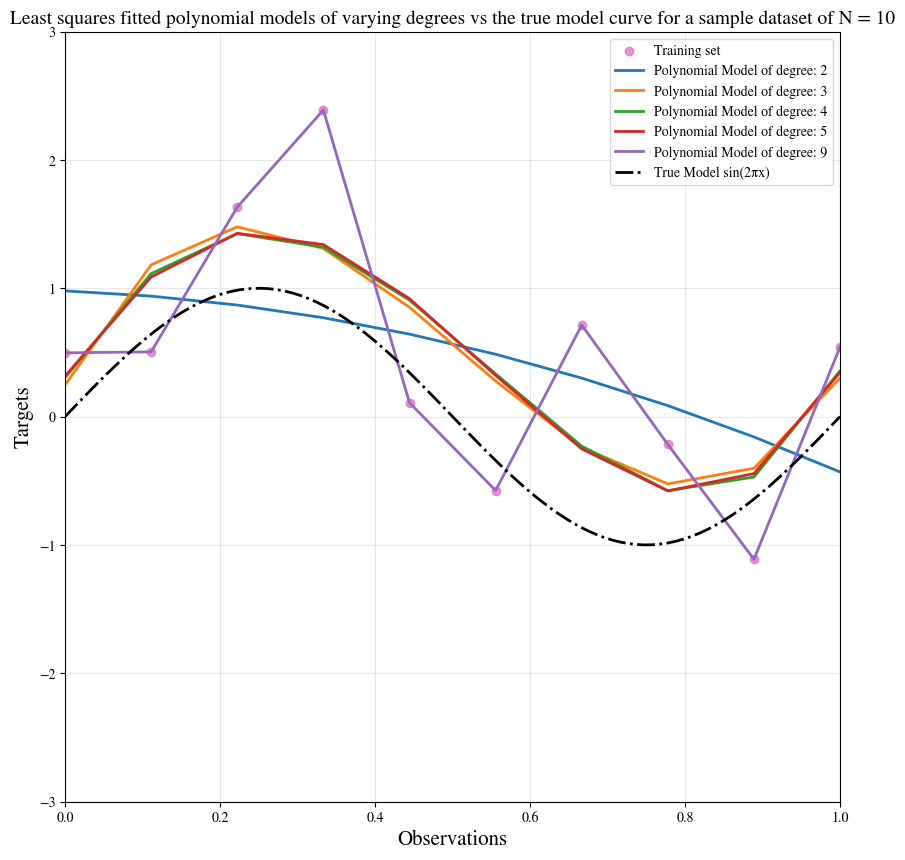

In [99]:
plot_fitted_models(X_train,y_train,per_polynomial_predictions,x,y)

### **For N=100 sample observations**

In [100]:
X_train,y_train,x,y = model_1.generate_model_points(100)
ploynomial_degrees = [2,3,4,5,9]
per_polynomial_w, per_polynomial_predictions, per_polynomial_RMSE = fit_and_evaluate_polynomials(X_train,y_train,model_1,ploynomial_degrees)
#Pass the results in a dataframe for a markdown table
data = {"Polynomial Model degree":ploynomial_degrees,"coefficients":per_polynomial_w,"RMSE":per_polynomial_RMSE}
df = pd.DataFrame(data)
# print(df.to_markdown()) #Utilized to print the df to markdown, which is then placed in a markdown cell shown below (seed is set to 42, thus the results are reproducible) 

|    |   Polynomial Model degree | coefficients                                                                                                       |    RMSE |
|---:|--------------------------:|:-------------------------------------------------------------------------------------------------------------------|--------:|
|  0 |                         2 | [1.0208, -1.535, -0.5271]                                                                                          | 7.73806 |
|  1 |                         3 | [-0.2861, 14.5532, -40.9504, 26.9489]                                                                              | 6.34884 |
|  2 |                         4 | [-0.0531, 9.6729, -18.7306, -7.73, 17.3395]                                                                        | 6.36587 |
|  3 |                         5 | [0.4925, -7.9299, 106.9717, -345.4233, 398.1769, -152.335]                                                         | 6.12001 |
|  4 |                         9 | [0.5861, -29.9141, 688.1066, -5959.3, 27318.9601, -73009.3786, 116985.5498, -110775.6813, 57243.3217, -12462.8772] | 6.01386 |

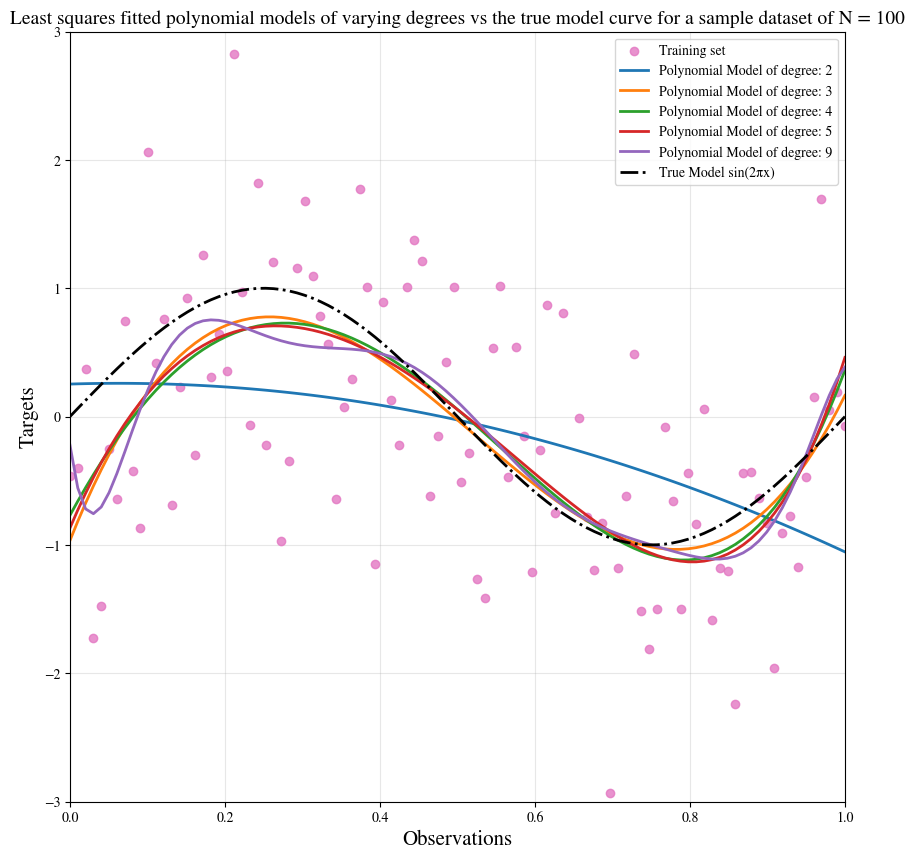

In [101]:
plot_fitted_models(X_train,y_train,per_polynomial_predictions,x,y)

### **Discussion**
The true generating model corresponds to a period $x\in[0,1]$ of the function $y = (2\pi x)$. As its graphically shown in the plots above plus Gaussian noise , the simplest model that can approximate very closely a period of the  $y = (2\pi x)$ function is a 3rd degree polynomial $y = b + w_1x + w_2x^2 + w_3x^3$ since it has $3$ roots.
- For a small number of points in the training set $N=10$:
  - The 2nd degree polynomial underfits the data, since it has less coefficients than the true model and thus cannot approximate it. Resulting in a high $RMSE$ score.
  - The 3rd degree polynomial fits the data very well, since it has the same number of coefficients as the true model and thus can approximate it very closely. Resulting in a lower $RMSE$ score and not large coefficients.
  - The 4th ,5th degree polynomials produce an even lower $RMSE$ score and not large coefficients, but some of their coefficients are extremly large compared to others in order to fit the 3rd degree polynomial shape, this is a sign of overfitting.
  - The 9th degree polynomial has the lowest $RMSE$ score and has completely overfitted the data. The value of most of its coefficinets has skyrocketed in order to pass from every single training point.

- For a large number of points in the training set $N=100$:
- Having more points, allows for a more accurate evaluation since we have more data to evaluate the $(RMSE) = \sqrt{\frac{1}{N} \sum_{i=1}^{N} ({y_{i_{pred}}}-{y_{i_{true}}})^2}$ over. 
- Concerining the RMSE score between the polynomial models and the values of the coefficients, the overall trend is the same as the previous case.

The above examples showcase very clearly the bias, variance trade-off:
   - The more complex the model in relation to the true model, the more it will overfit the data (showcased by an extremely low $RMSE$ score and large coefficients). Which in turn results in extremly low bias and very high variance since the model fits perfectly each training set, resulting in very different predictions for different noise in each training set. And thus its unable to generalize well to new data.
   - On the contrary very simple models such as the 2nd degree polynomial will underfit the data (showcased by a high $RMSE$ score and small coefficients). Which in turn results in extremly high bias and very low variance since the model does not fit the data well. This means that the model is able to generalize to new data and its not affected by the noise in the training set. However it is not able to fit the data well enough to produce accurate predictions.

In general its best practise to use the simplest model that can fit the data well enough in this case the 3rd degree polynomial. This allows for a good balance between bias and variance. Thus the model is able to generalize well to new data and its not affected drastically by the noise in the training set.

---

# **Problem 5: Full Bayesian Inference for polynomial regression** <a id="problem5"></a>

**In the same setup as Problem, we assume that the generating noise is distributed by $N(0,0.09)$, the model we will fit in this case is a $9th$ degree polynomial, with prior distribution of $\vec{w}$ being $N(\vec{w}|0,200I)$. Having the generating model $t = y(x) + \eta $ Construct the predictive model: $p(t|x,X,\vec{t}) = N(t|m(x),s^2(x))$, which allows us for every unseen randomly selected x (not in the training set) to produce a prediction and also quantify our uncertainty on the prediction. PLot $m(x)$ and $s^2(x)$ of the predictive Gaussian model for many different values of x selected randomly in the interval $0<x<1$, what do you observe? Discuss you findings.** 

## Solution


In order to perform a full Bayesian approch, given training data $X$,$y$ we are not intrested in just estimating the possterior distribution: $p(\vec{w}|X,\vec{y})$. Given any test point $x$ using the total probability theorem we want to find the predictive distribution: $p(y|x,X,\vec{t}) = \int p(y|x,\vec{w})p(\vec{w}|X,\vec{y})dw$


Since the noise of the generating model is Gausian white $\sim N(0, \beta^{-1} = σ_{generating}^2 = 0.09)$ and the prior probability distribution is Gaussian:  $N(w|0, \alpha^{-1}I=σ_{prior}^2 Ι = 200Ι)$, the posterior distribution which is the second term of the integral above, is also Gaussian and the integral can be solved analytically, giving a Gaussian of form  $N(y|m(x),s^2(x))$, where:

The mean and variance of the predictive distribution for each test point $x$, : 
$$m(x) = \beta\phi(x)^T\bold{S}\Phi^T\vec{y}$$ 
$$\sigma^2(x) = \frac{1}{\beta} + \phi(x)^T\bold{S}\phi(x)$$
where $\phi(x)$, $\Phi$ are the polynomial constructors (see `polynomial_model_construcotr` in Problem 4) for each test point $x$ and the training set $X$ respectively and $\bold{S}$, is given by:
$$S = (\alpha I + \beta \Phi\Phi^T)^{-1}$$

Utilizing these equations we code the `full_bayesian` function, which takes as arguments, the prior and generating variance, the $\Phi$ matrix for the test and train points as well as the training targets. It is used to find the $m(x)$ and $\sigma^2(x)$ of the predictive distribution for each $x$ in the test set 

In [102]:
def full_bayesian(a,b,Phi_train,y_train,Phi_test):
  # The Identity is an square matrix with rows and columns equal to the number of polynomial degrees + 1 for the bias term
  I = np.eye(Phi_train.shape[1])
  S = np.linalg.inv(a*I + b*Phi_train.T @ Phi_train)
  m_y = []
  var_y = []
  # For each test point, we calculate the mean and variance of the posterior distribution
  for i in range(Phi_test.shape[0]):
    m_y.append(b*Phi_test[i,:].T @ S @ Phi_train.T @ y_train)
    var_y.append(1/b + Phi_test[i,:].T @ S @ Phi_test[i,:])
  return np.array(m_y), np.array(var_y)

Having defined the `full_bayesian` function,:
1.  We call an isntance of `Least_squares_regression` and we utilize the `generate_model_points` method as explained previously to generate $10$ random train and $1000$ random test points $\in(0,1)$, its important to note that we wont use the LS method to fit the model
2.  Then we utilized `polynomial_model_constructor`, a  method that was also explained in problem 4, to construct the $\Phi$ matrices for the train and test points
3.  Finally using `full_bayesian`, passing in the relevant arguments explained above, we retrieve the mean and variance for each of the test points which we plot along with the true generating model
4.  Since the predictive distribution for each point is Gaussian, we can also plot the intervals 68%, 95% corresponding to 1 and 2 standard deviations from the mean respectively.

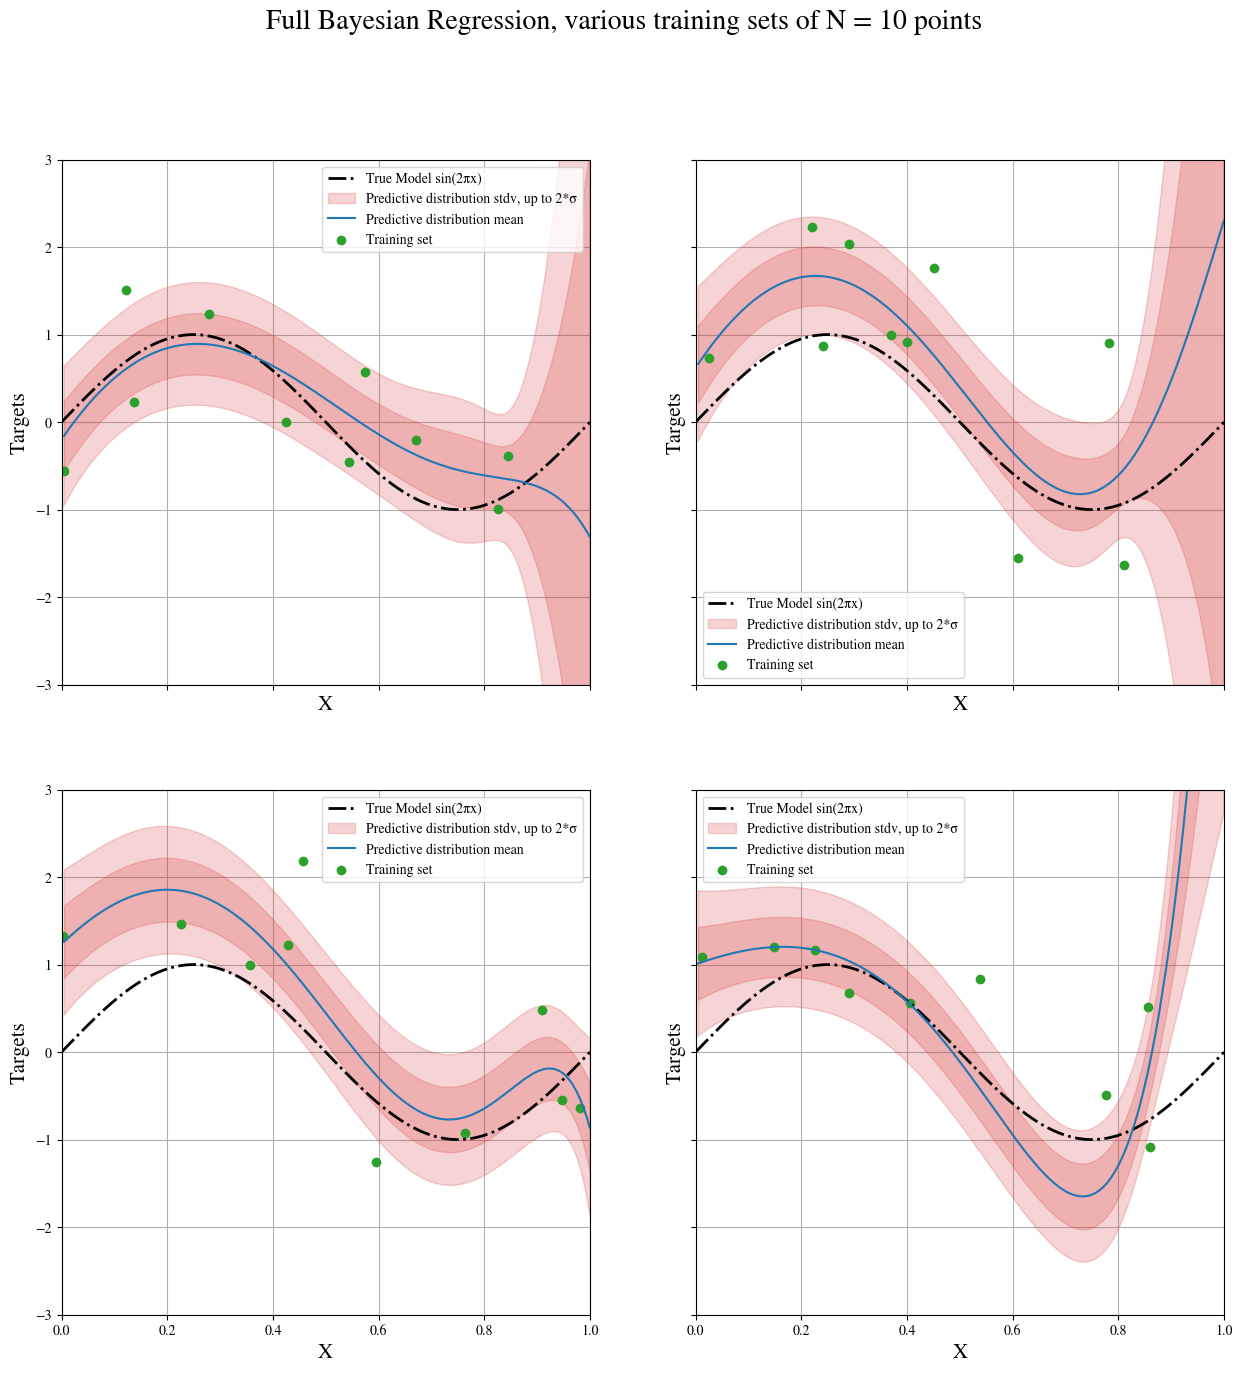

In [119]:
fig, axs = plt.subplots(2, 2, figsize=(15,15),sharex='all',sharey='all')
fig.suptitle("Full Bayesian Regression, various training sets of N = 10 points",fontsize = 20)
i = 0
for seed in [100,200,300,400]:
  np.random.seed(seed)  
  # We will use the same model only to generate the points as well as construct the phi matrices but not to fit the model
  model_2 = Least_squares_regression()
  # Generate the training set of 10 observations and construct the Phi matrix
  X_train,y_train,x,y = model_2.generate_model_points(10,evenly_spaced=False)
  Phi_train = model_2.polynomial_model_constructor(X_train,9)
  # Generate the test set of 1000 observations and construct the Phi matrix
  np.random.seed(42)
  X_test,y_test,x,y = model_2.generate_model_points(1000,evenly_spaced=False)
  X_test, y_test = np.sort(X_test), np.sort(y_test)
  Phi_test = model_2.polynomial_model_constructor(X_test,9) 

  # Calculate the mean and variance of the predictive distribution for each test point
  m_y,var_y = full_bayesian(0.005,11.1,Phi_train,y_train,Phi_test)

  # Plot the results for each training set
  ax = axs[i%2,i//2]
  ax.plot(x,y,label="True Model sin(2πx)", color = "Black",linewidth=2,linestyle='-.')
  ax.fill_between(X_test,m_y - 1*var_y**(1/2), m_y + 1*var_y**(1/2), color = "tab:red", alpha= 0.2,label = "Predictive distribution stdv, up to 2*σ")
  ax.fill_between(X_test,m_y - 2*var_y**(1/2), m_y + 2*var_y**(1/2), color = "tab:red", alpha= 0.2)
  ax.plot(X_test,m_y, color = "tab:blue" , label = "Predictive distribution mean")
  ax.scatter(X_train,y_train, color = "tab:green", label="Training set")
  ax.legend(fontsize = 10)
  ax.grid()
  ax.set_xlabel('X',fontsize = 15)
  ax.set_ylabel('Targets',fontsize = 15)
  ax.set_ylim(-3,3)
  ax.set_xlim(0,1)
  i += 1

## **Discussion**
- The prior variance of 200, is very large compared to the generating noise variance of 0.09, this results in a predictive variance based almost entirely on the small training set. 
- For the aforementioned reason, the predictive model has very high standard deviation(uncertainty) for test points that fall in a region that is not precceded by any training points and the last training observations encountered produced ambiguouty in the minimaziation of the $RMSE$. This case is showcased clearly in the first and second subplots above.
- On the contrary, in the third and fourth subplots retains an overall lower standard deviation because the training points are well distributed in the $(0,1)$ interval.
- Finally, taking into account the previous two points and inspecting the four subplots together, the high variance of the $9th$ degree polynomial predictive model is evident, since the predictive distribution mean is wildly different between training sets generated by the same $sin(2\pi x)$ model.

---